# Day 9: Comparing Text with Cosine Similarity

Yesterday we learned that embeddings convert text into vectors.

But how do we actually **compare** two vectors to see if texts are similar?

That's where **cosine similarity** comes in.

## Setup

In [36]:
from google import genai
import os
from dotenv import load_dotenv
import numpy as np

load_dotenv(dotenv_path='../.env')
API_KEY = os.environ["GEMINI_API_KEY"]
client = genai.Client(api_key=API_KEY)

## Comparing Two Texts

Let's take two sentences that mean the same thing but use different words.

In [37]:
text_a = "The cat sat on the mat"
text_b = "A feline rested on the rug"

# Get embeddings
emb_a = client.models.embed_content(model="gemini-embedding-001", contents=text_a).embeddings[0].values
emb_b = client.models.embed_content(model="gemini-embedding-001", contents=text_b).embeddings[0].values

print(f"Text A: '{text_a}'")
print(f"Text B: '{text_b}'")
print(f"\nBoth have {len(emb_a)} dimensions")

Text A: 'The cat sat on the mat'
Text B: 'A feline rested on the rug'

Both have 3072 dimensions



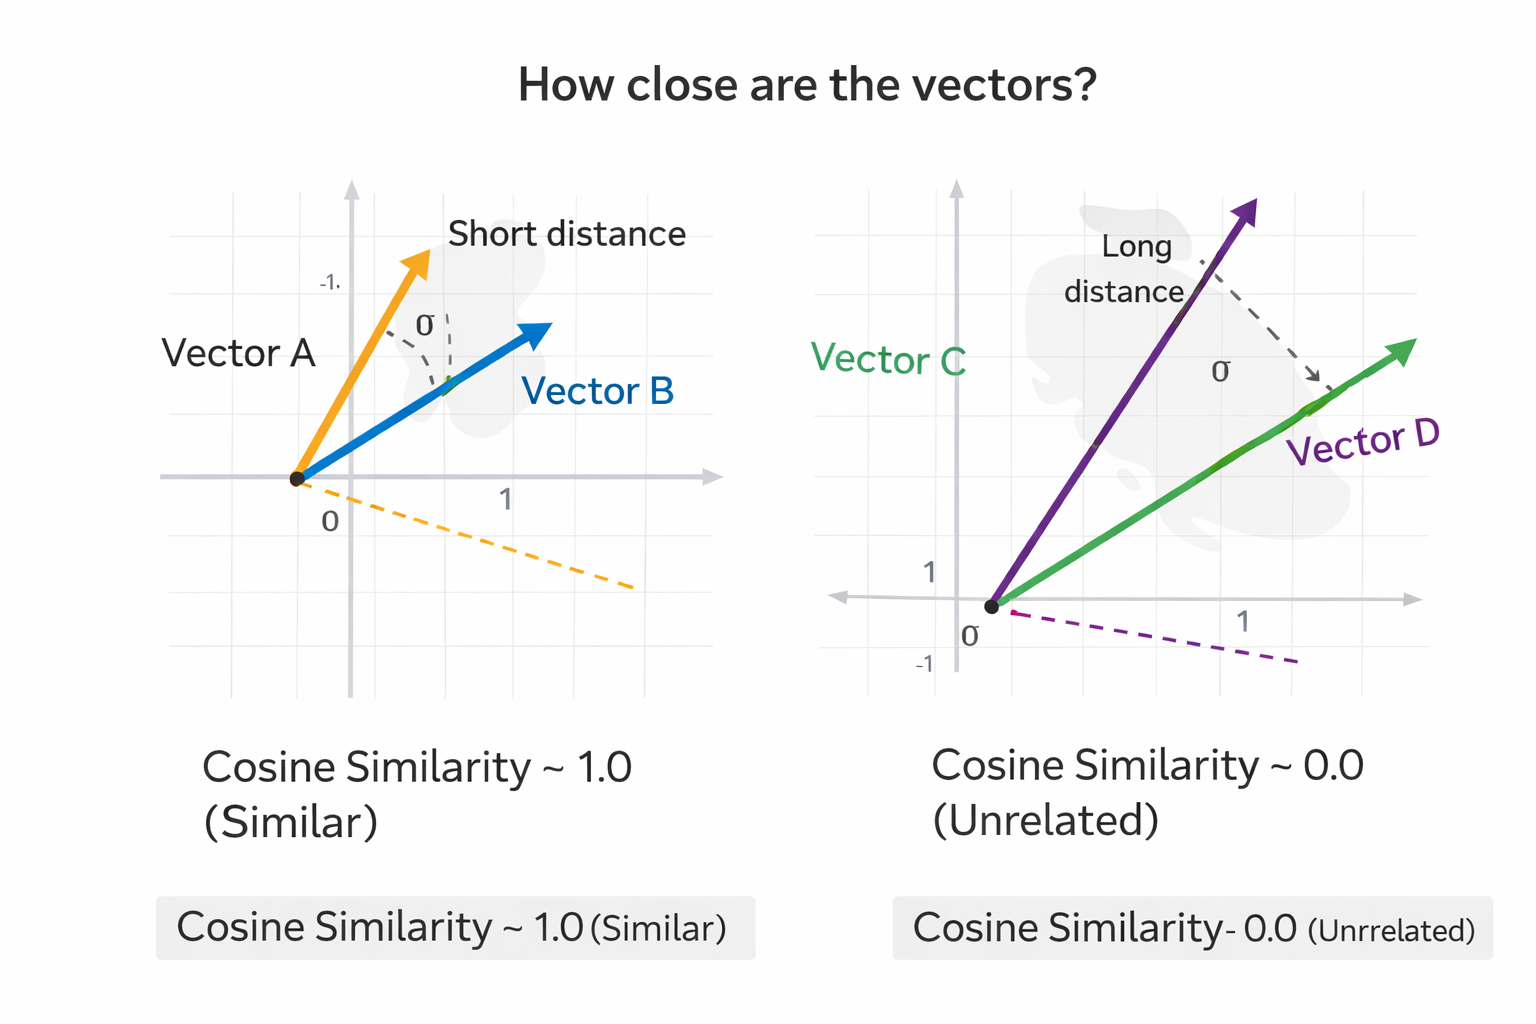


In [38]:
def cosine_similarity(vec1, vec2):
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

similarity = cosine_similarity(emb_a, emb_b)
print(f"Similarity between A and B: {similarity:.4f}")

Similarity between A and B: 0.7618


## What is Cosine Similarity?

**Cosine similarity** measures the angle between two vectors:

- `1.0` = identical direction (same meaning)
- `0.0` = perpendicular (unrelated)
- `-1.0` = opposite direction (rare in practice)

Formula: `cos(θ) = (A · B) / (||A|| × ||B||)`

- Dot product of the vectors
- Divided by the product of their magnitudes

## Similar vs Different Texts

Let's compare sentences with similar meaning vs completely different topics.

In [39]:
sentences = [
    "Machine learning is a subset of AI",
    "ML is part of artificial intelligence",
    "The weather is nice today"
]

# Generate embeddings
embeddings = []
for s in sentences:
    emb = client.models.embed_content(model="gemini-embedding-001", contents=s).embeddings[0].values
    embeddings.append(emb)

# Compare
print("Comparing sentences:\n")
print(f"1: '{sentences[0]}'")
print(f"2: '{sentences[1]}'")
print(f"3: '{sentences[2]}'")

print(f"\n1 vs 2 (similar meaning): {cosine_similarity(embeddings[0], embeddings[1]):.4f}")
print(f"1 vs 3 (different topic):  {cosine_similarity(embeddings[0], embeddings[2]):.4f}")

Comparing sentences:

1: 'Machine learning is a subset of AI'
2: 'ML is part of artificial intelligence'
3: 'The weather is nice today'

1 vs 2 (similar meaning): 0.8303
1 vs 3 (different topic):  0.5300


## Why This Matters

Cosine similarity is the foundation of:

1. **Semantic Search** — Find documents by meaning, not keywords
2. **Duplicate Detection** — Find similar content
3. **Clustering** — Group related documents
4. **RAG Systems** — Retrieve relevant context for LLMs

---

## Key Takeaways

1. **Cosine similarity** measures how similar two vectors are
2. Score of **1.0** = identical meaning, **0.0** = unrelated
3. Texts with **same meaning but different words** score high
4. Texts about **different topics** score low

---

**Next:** Day 10 — Building a semantic search system